In [65]:
# do some importing
from datetime import datetime
import tweepy
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
config = json.loads(open("config.json", "r").read())
auth = tweepy.OAuthHandler(config["CONSUMER_KEY"], config["CONSUMER_SECRET"])
auth.set_access_token(config["ACCESS_TOKEN"] , config["ACCESS_TOKEN_SECRET"])
api = tweepy.API(auth)

In [3]:
current_page, total_tweets = 0, []
while True:
    public_tweets = api.user_timeline("dnarepl", count=500, page=current_page)
    if(len(public_tweets) == 0):
        # go to the next page until one of them is empty
        break
        
    total_tweets.extend(public_tweets)
    current_page += 1
    # can only see so many tweets per page so go to the next page

In [53]:
print(len(total_tweets))

3378


In [88]:
likes = pd.Series([t.favorite_count for t in total_tweets])
text = pd.Series([t.text for t in total_tweets])
dates = pd.Series([t.created_at for t in total_tweets])

df = pd.DataFrame({"likes" : likes, "dates": dates, "text": text})
df.set_index("dates", inplace=True)

In [91]:
df[df.likes == df.likes.max()]

,likes,text
dates,,
2019-03-13 20:00:56,188,https://t.co/936fMzsmo5


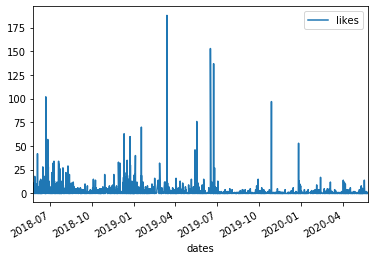

In [93]:
df.plot()